# 新打字界面（双独立样本检验）

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
from openpyxl import load_workbook 
import matplotlib.pyplot as plt
import warnings # 非致命错误
warnings.filterwarnings('ignore',category=DeprecationWarning)
from scipy import stats #包含贝叶斯方法和机器学习模型

In [2]:
data = pd.ExcelFile(r"C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\AB测试分析\键盘AB测试.xlsx")
data=data.parse("Sheet1",dtype="int")
data.describe()

,A,B
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


## 描述性统计

In [3]:
#第一组数据均值
A_mean = data['A'].mean()
# 第一组数据标准差
A_std = data['A'].std()

# 第二组数据均值
B_mean = data['B'].mean()
# 第二组数据标准差
B_std = data['B'].std()

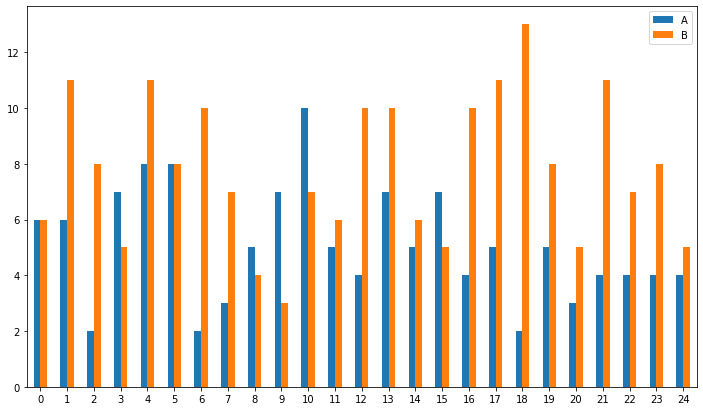

In [4]:
#两个样本数据集对比
#画板
fg = plt.figure(figsize = (12,7))
#画纸
ax = fg.add_subplot(1,1,1)#nrows=1，ncolumns=1的第一个子图
#绘制柱状图
data.plot(kind = 'bar',ax = ax)
plt.xticks(rotation=0)  # 横坐标名称旋转30度
plt.show()

In [5]:
print('描述统计分析结果：')
print('第一组数据：A键盘，实验者的打字平均出错数是:',A_mean,'个,标准差是',A_std,'个')
print('第二组数据：B键盘，实验者的打字平均出错数是:',B_mean,'个,标准差是',B_std,'个')
print('可见，A键盘的出错均值小于于B键盘')

描述统计分析结果：
第一组数据：A键盘，实验者的打字平均出错数是: 5.08 个,标准差是 2.05993527406405 个
第二组数据：B键盘，实验者的打字平均出错数是: 7.8 个,标准差是 2.6457513110645903 个
可见，A键盘的出错均值小于于B键盘


## 推断统计 

In [6]:
### 假设检验

本次统计主要是为了确定A，B两种键盘的出错率，因此作出以下假设
* 零假设H0：A,B两种键盘打字出错率没有明显区别；
* 备选假设H1：A,B两种键盘的打字出错率存在明显区别。

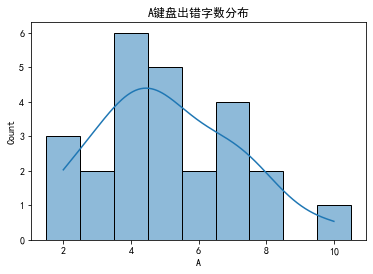

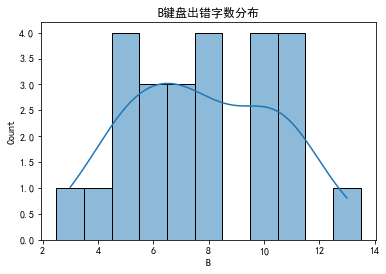

In [7]:
#查看数据集分布
##添加中文标题须用下列代码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.histplot(data['A'],kde = True,discrete=True)
plt.title('A键盘出错字数分布')
plt.show()
sns.histplot(data['B'],kde = True,discrete=True)
plt.title('B键盘出错字数分布')
plt.show()

In [8]:
Shapiro_testA = stats.shapiro(data.A)
Shapiro_testB = stats.shapiro(data.B)

In [9]:
print(Shapiro_testA)
print(Shapiro_testB)

ShapiroResult(statistic=0.9509594440460205, pvalue=0.2634974718093872)
ShapiroResult(statistic=0.9543656706809998, pvalue=0.3136821985244751)


p值均小于0.05，所以说明可以接受两样本服从正态分布

In [10]:
t,p_twoTail = stats.ttest_ind(data['A'],data['B'])
print('t值=',t,'双边检验的p值=',p_twoTail) 

t值= -4.055938536857321 双边检验的p值= 0.00018256061720148224


In [11]:
import statsmodels.stats.weightstats as st
'''
ttest_ind：独立双样本t检验，
usevar='unequal'两个总体方差不一样
返回的第1个值t是假设检验计算出的（t值），
第2个p_two是双尾检验的p值
第3个df是独立双样本的自由度
'''
t,p_two,df=st.ttest_ind(data['A'],data['B'],usevar='unequal')

#自由度一般只保留整数部分
print('t=',t,'p_two=',p_twoTail,',df=',df)

t= -4.055938536857321 p_two= 0.00018256061720148224 ,df= 45.27813331135627


In [12]:
#显著水平
a=0.05
#决策
if(p_twoTail< a):
    print('拒绝零假设')
    print('接受备选假设：AB键盘打字出错数存在明显差异')
else:
    print('接受备选假设，统计不显著，也就是AB键盘不存在明显差异')

拒绝零假设
接受备选假设：AB键盘打字出错数存在明显差异


### 置信区间

In [13]:
#t值获取渠道https://www.graphpad.com/quickcalcs/statratio1/（利用这个工具获取t值，需要注意输入的概率值是1-95%=0.05）
t_ci=2.0141
#差值数据集平均值
sample_mean=A_mean-B_mean
#使用双样本独立假设的标准差计算公式
se=np.sqrt(np.square(A_std)/25+np.square(B_std)/25)
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se
#标准误差:https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

In [14]:
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[-4.070699,-1.369301]


可见，新的界面可以使得打字错误数减少1-4个

### 效应量

In [15]:
# 不过分依赖p值，如果p值说明新的策略有影响，效应量则用于衡量这种影响有多大，这里采用Cohen's d（应用于连续数值）
# 详见https://zhuanlan.zhihu.com/p/361984708

#差值数据集的合并标准差
sample_std=np.sqrt((24*np.square(A_std)+24*np.square(B_std))/48)#样本标准差

#计算效应量
d1=(-A_mean + B_mean) / sample_std



## 小样本要用修正版的Cohen's d即Hedges' ｇ
d2=d1*(1-3/(4*(25+25-2)-1))
print('d=',d2)

d= 1.1291739245563963


d值大于0.8，可以认为新系统效应较大
（但这个标准是Cohen个人经验的体现）

# 特鲁普效应（相关配对检验）

特鲁普效应是著名的心理学现象，展示了人们对事物的认知过程已是一个自动化的历程。当有一个新的刺激出现时，如果它的特征和原先的刺激相似或符合一致，便会加速人们的认知；反之，若新的刺激特征与原先的刺激不相同，则会干扰人们的认知，使人们的所需的反映数据变长。
简单来说，斯特鲁普效应是当有与原有认知不同的情况出现时，人们的反应时间会较长。

In [16]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # 非致命错误
warnings.filterwarnings('ignore',category=DeprecationWarning)
from scipy import stats #包含贝叶斯方法和机器学习模型

## 描述性统计

In [17]:
data=pd.read_csv(r"C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\斯特鲁普效应分析\Stroop数据集.csv")
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


从描述性统计中我们可以看到，均值和方差都有较大差异

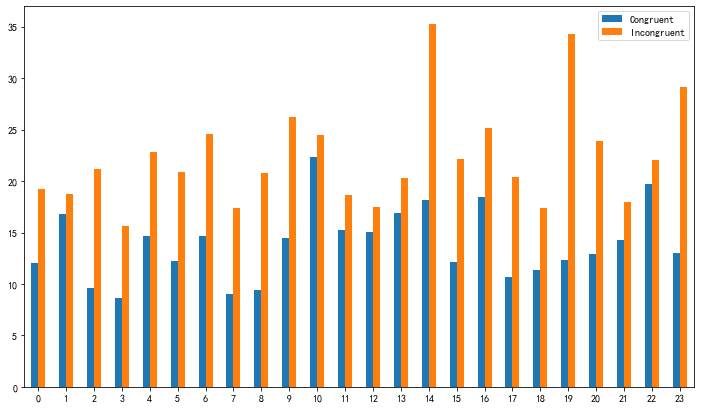

In [18]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(1,1,1)
data.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
plt.show()

从图上可以看出，对于每一个实验对象，非一致的认知时间要明显高于一致的认知

In [19]:
con_mean=data['Congruent'].mean()
con_std=data['Congruent'].std()
inc_mean=data['Incongruent'].mean()
inc_std=data['Incongruent'].std()
print('描述统计分析结果：')
print('第一组数据：一致认知，实验者认知平均时间为:',con_mean,',标准差是',con_std)
print('第二组数据：非一致认知，实验者认知平均时间为:',inc_mean,',标准差是',inc_std)
print('可见，非一致认知平均时间要大于一致认知')

描述统计分析结果：
第一组数据：一致认知，实验者认知平均时间为: 13.926875 ,标准差是 3.54021942715297
第二组数据：非一致认知，实验者认知平均时间为: 22.35075 ,标准差是 5.010217727196399
可见，非一致认知平均时间要大于一致认知


## 推断统计

### 假设检验

* H0: 一致认知和非一致认知时间无显著差异
* H1: 一致认知和非一致认知时间有显著差异，且非一致时间较长

In [20]:
#样本量小于5000，所以用Shapiro而不用ks
data1=data.Incongruent-data.Congruent
Shapirotest=stats.shapiro(data1)
print(Shapirotest)

ShapiroResult(statistic=0.9270333051681519, pvalue=0.08369500190019608)


Text(0.5, 1.0, '数据集分布')

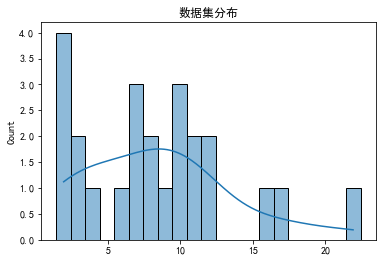

In [21]:
sns.histplot(data1,discrete=True,kde=True)
plt.title("数据集分布")

数据仅有24<30,属于小样本，而根据shapiro检验，p值大于0.05，样本总体可以接受为正态分布，所以采用配对t检验，自由度为24-1=23

In [22]:
'''
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）配对t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''
t,p =stats.ttest_rel(data['Congruent'],data['Incongruent'],alternative='less')
print('t值为',t,'单边检验p值为',p)

t值为 -8.088610872807589 单边检验p值为 1.774359574862448e-08


In [23]:
alpha=0.05
'''
左尾判断条件：t < 0 and  p < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p < 判断标准（显著水平）alpha
'''
#做出结论
if(t<0 and p< alpha): 
    print('拒绝零假设，统计显著，存在斯特鲁普效应')
else: 
    print('接受零假设，统计不显著，不存在斯特鲁普效应')

拒绝零假设，统计显著，存在斯特鲁普效应


### 置信区间

In [24]:
t_ci=2.064
se=stats.sem(data1)#使用scipy计算标准误差
a=data1.mean()-t_ci*se
b=data1.mean()+t_ci*se

In [25]:
print('单个平均值的置信区间，95置信水平 CI=(%f,%f)' % (a,b))

单个平均值的置信区间，95置信水平 CI=(6.274324,10.573426)


这说明非一致认知时间要平均比一致认知时间多出6-10各单位

### 效应量

In [26]:
sam_std=np.sqrt((np.square(con_std)+np.square(inc_std))/2)
d=(inc_mean-con_mean)/sam_std
d_adjust=d*(1-3/(4*(24+24-2)-1))
print('d=',d_adjust)

d= 1.9100725154674116


d值大于0.8，可以认为效应较大